In [1]:
import pygraphviz as pgv

from IPython.display import Image, display

from transition_graph import TransitionGraph
from utils import *

In [2]:
def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

# Basic Utils

### Check if string is from language

In [3]:
bool(match_string_from_lang("ababab", ["aba", "bab"]))

True

### Generate Power String on length n

In [4]:
power_string(3, ["b", "a"])

['bbb', 'bba', 'bab', 'baa', 'abb', 'aba', 'aab', 'aaa']

### Check if string is plindrome

In [5]:
is_palindrome('baababa', ['ba', 'aba'])

True

### Generate power palindrom string of length n

In [6]:
power_palindrome_string(4, ['a', 'b'])

['aaaa', 'abba', 'baab', 'bbbb']

# Transition Graph

In [3]:
# create a transition graph from transition table
tg = TransitionGraph.from_transition_table(
    ['a', 'b'], # language words
    {
        'q1': ['q2', 'q3'],
        'q2': ['q1', None, 'q3'],
        'q3': [None, ['q3', 'q4']],
        'q4': [['q3', 'q2'], None],
    },
    start_node='q1',
    finish_nodes=['q3', 'q4']
)

# Some other examples
# tg = TransitionGraph.from_transition_table(['a', 'b'], {
#         'q0': [None, None, ['q1', 'q2']],
#         'q1': ['q3', None],
#         'q2': ['q4', None],
#         'q3': [None, 'q1'],
#         'q4': [None, 'q5'],
#         'q5': ['q2', None]
#     }, start_node='q0', finish_nodes=['q1', 'q2'])

# tg = TransitionGraph.from_transition_table(['a', 'b'], {
#         'q1': ['q1', 'q2'],
#         'q2': ['q3', 'q2'],
#         'q3': ['q1', 'q2'],
#     }, start_node='q1', finish_nodes=['q1'])

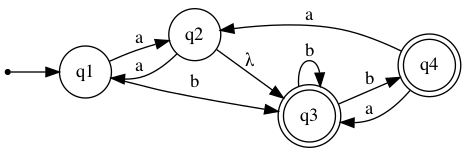

In [8]:
# draw transition graph
draw(tg.to_dot_diagram())

In [9]:
# evaluate string on transition graph
tg.evaluate('aab')

[True, 'q3', 3]

### State Elimination

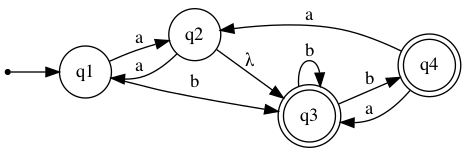

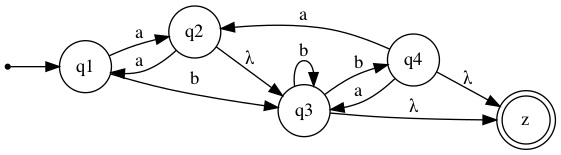

q1-(a)->q2 q2-(a)->q1 aa
q1-(a)->q2 q2-(λ)->q3 a
q4-(a)->q2 q2-(a)->q1 aa
q4-(a)->q2 q2-(λ)->q3 a


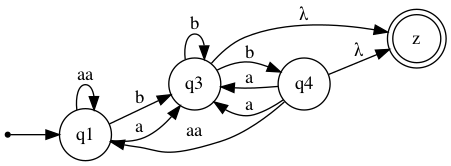

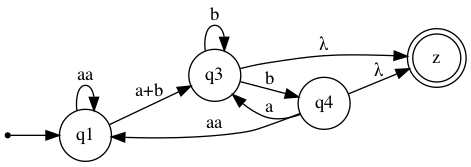

removed self edge q3-(b)->q3
q1-(a+b)->q3 q3-(b)->q4 (a+b)((b)*)b
q1-(a+b)->q3 q3-(λ)->z (a+b)((b)*)
q4-(a)->q3 q3-(b)->q4 a((b)*)b
q4-(a)->q3 q3-(λ)->z a((b)*)


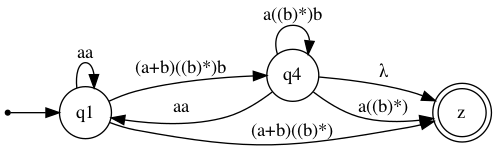

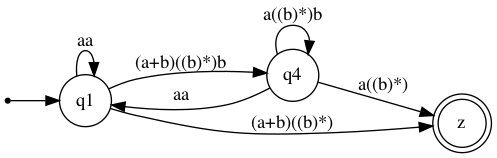

removed self edge q4-(a((b)*)b)->q4
q1-((a+b)((b)*)b)->q4 q4-(aa)->q1 ((a+b)((b)*)b)((a((b)*)b)*)(aa)
q1-((a+b)((b)*)b)->q4 q4-(a((b)*))->z ((a+b)((b)*)b)((a((b)*)b)*)(a((b)*))


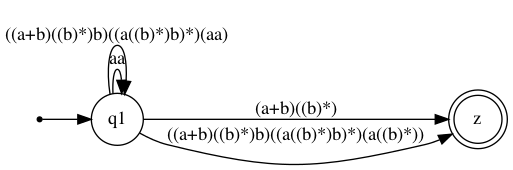

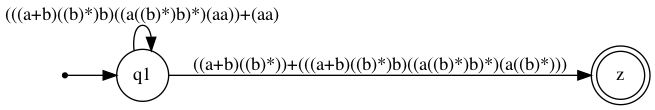

In [10]:
tg1 = tg.clone()
display(draw(tg1.to_dot_diagram()))

# elimnate state until only start and finish states are left
while tg1.eliminate_state():
    display(draw(tg1.to_dot_diagram()))

### NFA to DFA

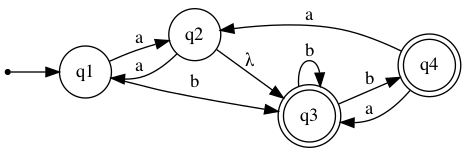

In [8]:
draw(tg.to_dot_diagram())

In [4]:
tt = tg.to_dfa()
tt[1]

{'q1': [['q2'], ['q3']],
 'q3': [[], ['q3', 'q4']],
 'q3q4': [['q3', 'q2'], ['q3', 'q4']],
 'q3q2': [['q1'], ['q3', 'q4']],
 'q2': [['q1'], []]}

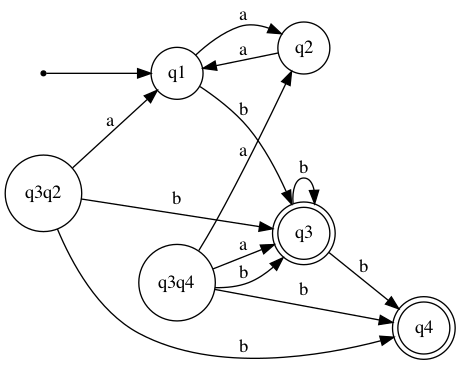

In [5]:
dfa = TransitionGraph.from_transition_table(*tt)
draw(dfa.to_dot_diagram())

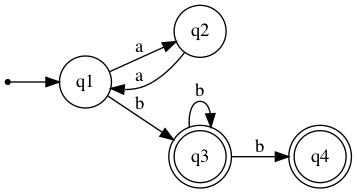

In [7]:
dfa.remove_hanging_node()
draw(dfa.to_dot_diagram())

### RE to NFA

In [ ]:
# TOOD:

### Mealy to Mealy

In [ ]:
# TOOD:

### Moore to Mealy

In [18]:
# TOOD: